In [ ]:
%load_ext autoreload
%autoreload 2

In [ ]:
import numpy as np
from tqdm.auto import tqdm

from modules.data_manage.load_mnist import load_mnist
from modules.grammar.grammar import Grammar
from modules.grammar.merge.stupid_merge_same_nodes import stupid_merge_same_nodes
from modules.plots.draw_imgs import draw_imgs
from modules.plots.plot_random_from_grammar import plot_random_from_grammar
from modules.utils import inject_jupyter_style

inject_jupyter_style()

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [22]:
x_train, y_train, x_test, y_test = load_mnist(size=1000)
# draw_imgs(x_train, (2, 7), random=False)

Train: (1000, 32, 32) (1000,)
Test:  (1000, 32, 32) (1000,)


In [23]:
grammar = Grammar(colors=x_train.max() + 1)
grammar.add_images(x_train[y_train == 0])

  0%|          | 0/97 [00:00<?, ?it/s]

In [27]:
stupid_merge_same_nodes(grammar)

  0%|          | 0/136886 [00:00<?, ?it/s]

  0%|          | 0/100059 [00:00<?, ?it/s]

  0%|          | 0/69387 [00:00<?, ?it/s]

  0%|          | 0/45564 [00:00<?, ?it/s]

  0%|          | 0/28485 [00:00<?, ?it/s]

  0%|          | 0/19647 [00:00<?, ?it/s]

  0%|          | 0/16279 [00:00<?, ?it/s]

  0%|          | 0/14381 [00:00<?, ?it/s]

  0%|          | 0/13491 [00:00<?, ?it/s]

  0%|          | 0/13061 [00:00<?, ?it/s]

  0%|          | 0/12846 [00:00<?, ?it/s]

(136886, 12846)

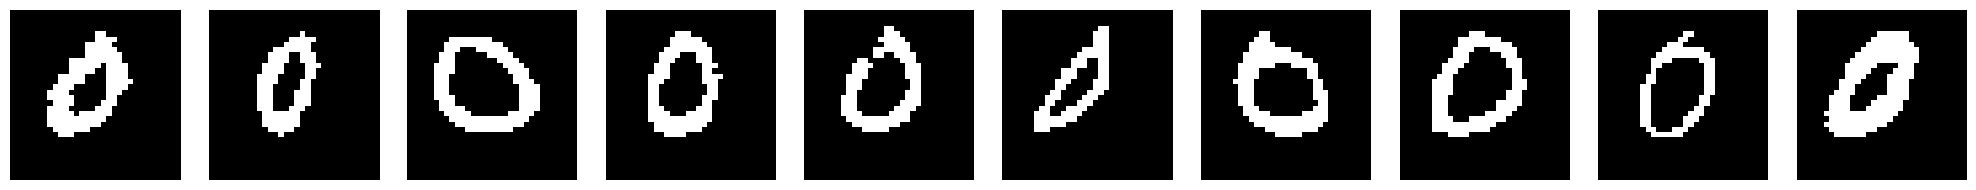

In [24]:
plot_random_from_grammar(grammar, (10,))

In [31]:
for img in tqdm(x_train[y_train == 0]):
    if not grammar.is_image_in_grammar(img):
        print("bad!")

  0%|          | 0/97 [00:00<?, ?it/s]